<a href="https://colab.research.google.com/github/endzix22/machine-learning-bootcamp/blob/main/UM2_braki_danych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jakie są możliwości w przypadku braku danych:


1.   Usunięcie rekordów z brakami (jak np. masz duzo danych) z pandas
2.   Uzupełnienie braków np: mean,median
3.   Wytrenowanie modelu w celu uzupełnienia brakow
4.   Zastosowanie interpolacji (szeregi czasowe)








Ważne! W celu uzupełnienia braków danych (np. średnią, medianą) obliczeń dokonujemy na zbiorze treningowym. Zapobiega to wyciekowi informacji ze zbioru testowego

In [1]:
import numpy as np 
import pandas as pd 
import sklearn 


In [5]:
data = {
    'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

df_raw = pd.DataFrame(data=data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [7]:
df=df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   6 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  4 non-null      float64
 5   bought  6 non-null      object 
dtypes: float64(2), object(4)
memory usage: 416.0+ bytes


Sprawdzanie braków

In [9]:
df.isnull()
#tam gdzie np. NaN zwroci True

,size,color,gender,price,weight,bought
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,True,False,False,False,True,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False


In [12]:
df.isnull().sum()
#policzy nam w kolumnach ile jest brakow danych

size      1
color     0
gender    1
price     1
weight    2
bought    0
dtype: int64

In [13]:
#otrzymanie lacznej ilosci braku danych:
df.isnull().sum().sum()

5

In [18]:
#procent braku danych:
df.isnull().sum()/len(df)*100
#np. pozniej piszac funkcje, ze np. jesli braki danych sa wieksze od to....

size      16.666667
color      0.000000
gender    16.666667
price     16.666667
weight    33.333333
bought     0.000000
dtype: float64

Simplelmputer 
do uzupełniania w prosty sposob brakow

In [23]:
from sklearn.impute import SimpleImputer

#strategy:'mean','median','most_frequent','constant'
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
#srednia zastepujemy braki np.NaN
imputer.fit(df[['weight']])
#do ktorej kolumny maja byc zastosowane 
df['weight']=imputer.transform(df[['weight']])
#wrzuc zmiane do DF 
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


II metoda do uzupełniania braków poprzez stawianie jakies stalej, ustalonej wartosci w te miejsca

In [24]:
imputer=SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=99.0)
imputer.fit_transform(df[['price']])
#zauwaz ze zmiany nie zostaly przypisane na stale

array([[199.],
       [ 89.],
       [ 99.],
       [129.],
       [ 79.],
       [ 89.]])

In [25]:
imputer=SimpleImputer(missing_values=np.nan,strategy='constant',fill_value='L')
imputer.fit_transform(df[['size']])
#zauwaz ze zmiany nie zostaly przypisane na stale

array([['XL'],
       ['L'],
       ['M'],
       ['L'],
       ['M'],
       ['M']], dtype=object)

III sposob czyli uzupelnianie kolumny najczesciej wystepujacym elementem 

In [26]:
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer.fit_transform(df[['size']])
#poki co brak przypisania na stale

array([['XL'],
       ['L'],
       ['M'],
       ['M'],
       ['M'],
       ['M']], dtype=object)

In [28]:
#jeszcze raz zacznijmy od poczatku, od kopii od oryginalu
df=df_raw.copy()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [29]:
df.isnull().sum()

size      1
color     0
gender    1
price     1
weight    2
bought    0
dtype: int64

In [30]:
pd.isnull(df['weight'])

0    False
1    False
2    False
3     True
4    False
5     True
Name: weight, dtype: bool

In [31]:
pd.isnull(df['weight']).sum()

2

In [32]:
#pokaz te wiersze gdzie w kolumnie 'weight' wystepuja braki danych

In [33]:
df[pd.isnull(df['weight'])]

,size,color,gender,price,weight,bought
3,NaN,green,female,129.0,NaN,no
5,M,green,male,89.0,NaN,no


In [35]:
df[~ pd.isnull(df['weight'])]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes


In [36]:
pd.notnull(df['weight'])

0     True
1     True
2     True
3    False
4     True
5    False
Name: weight, dtype: bool

In [37]:
df[pd.notnull(df['weight'])]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes


IV metoda, metoda fillna(),
uzupelnianie automatycznie wszytskich brakow danych

In [39]:
df.fillna(value='brak')
#zastapienie brakow, slowem 'brak'

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,brak,brak,300.0,yes
3,brak,green,female,129.0,brak,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,brak,no


In [41]:
df.fillna(value=0.0)
#wstawienie zera w miejsca np.NaN

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,0.0,0.0,300.0,yes
3,0.0,green,female,129.0,0.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,0.0,no


In [43]:
df['size']

0    XL
1     L
2     M
3     L
4     M
5     M
Name: size, dtype: object

In [44]:
#zastapienie jakas wartoscia na stale w kolumnie
df['size'].fillna(value='L',inplace=True)
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,L,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [48]:
df.dropna()
#metoda usuwania wszystkcih wierszy, gdzie wystapia min. raz braki, ale mozna 
#zmienic w paramerach f, ze usun jak np sa min 2 braki

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
4,M,red,female,79.0,410.0,yes


In [ ]:
df.dropna()

BRAKI DANYCH W SZEREGACH CZASOWYCH:

In [49]:
data = {'price': [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
date_range = pd.date_range(start='01-01-2020 09:00', end='01-01-2020 18:00', periods=10)

df = pd.DataFrame(data=data, index=date_range)
df

,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,109.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,NaN
2020-01-01 15:00:00,NaN
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0


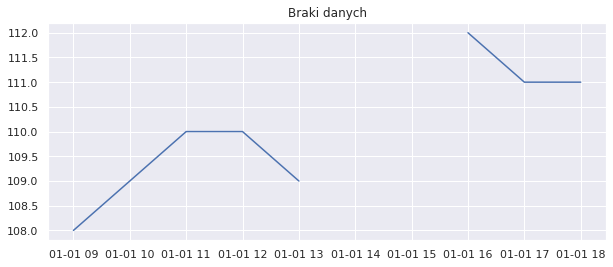

In [50]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns
register_matplotlib_converters()
sns.set()

plt.figure(figsize=(10, 4))
plt.title('Braki danych')
_ = plt.plot(df.price)

In [51]:
import plotly.express as px

df_plotly = df.reset_index()
px.line(df_plotly, 'index', 'price', width=600, height=400, 
        title='Szeregi czasowe - braki danych')

Usunięcie braków

In [52]:
df_plotly = df_plotly.dropna()
px.line(df_plotly, 'index', 'price', width=600, height=400, 
        title='Szeregi czasowe - braki danych')

Wypełnienie braków stałą wartością 0

In [53]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(0)
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, 
        title='Szeregi czasowe - braki danych - wstawienie 0')

Wypełnienie braków średnią

In [54]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(df_plotly['price'].mean())
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, 
        title='Szeregi czasowe - braki danych - wstawienie średniej')

Zastosowanie interpolacji

In [55]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].interpolate()
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, 
        title='Szeregi czasowe - braki danych - interpolacja')

Wypełnienie braków metodą forward fill

In [56]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(method='ffill')
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, 
        title='Szeregi czasowe - braki danych - forward fill')

Wypełnienie braków metodą backward fill

In [57]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(method='bfill')
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, 
        title='Szeregi czasowe - braki danych')